In [7]:
!pip install praat-parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 77.8 MB/s eta 0:00:00


https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.Sound

Чтение файла

In [ ]:
import parselmouth
sound = parselmouth.Sound("cta0001.wav")

Объект Intensity

In [ ]:
intensity = sound.to_intensity()

Получим времена

In [ ]:
from numpy import arange
times = arange(0, sound.xmax, 0.01)

Построим график

In [33]:
import matplotlib.pyplot as plt
plt.plot(times, [intensity.get_value(i) for i in times])
plt.show()

NameError: ignored

Сделаем Sound из ndarray

In [ ]:
from scipy.io.wavfile import read, write
fs, data = read("cta0001.wav")
new_sound = parselmouth.Sound(values=data, sampling_frequency=fs)

In [ ]:
print(new_sound.centre_time) # середина сигнала

0.8738095238095238


Получим объект Pitch

In [ ]:
pitch = sound.to_pitch(pitch_ceiling=400)
pitch_vals = [pitch.get_value_at_time(i) for i in times]

In [ ]:
print(pitch_vals)

[nan, nan, 157.9299377859113, 154.2208690571565, 152.54858937903603, 153.39506785051486, 153.09002018707832, 151.61690652750275, 149.18896731928353, 147.65105419749332, 147.01101260109877, 147.3580670934425, 149.19153620331085, 153.07824345903967, 160.84876524861266, 176.5207197900817, 196.18662588038512, 215.47688148389116, 235.16925025964815, 254.38565497713643, 271.73617623211635, 282.64133390281745, 289.23072825210096, 296.8582070415528, 306.0437977122131, 314.9168585686077, 320.81731740296647, 323.99948490293576, 324.7928385540928, 321.5257661810458, 317.53472078383237, 319.753975248626, 322.00887791541277, 321.1202418488857, 319.4870863321601, 316.92154571511213, 314.72029654228066, 313.5324092533779, 312.8574283598959, 311.8334531516055, 310.4442303728458, 310.07759078891286, 313.3965410320922, 316.8629299922522, 317.19095148196885, 317.3464303466359, 317.5776727806807, 316.80459321520385, 317.2771562215067, nan, nan, nan, nan, nan, 216.04135687169165, 211.9214687861211, 203.887

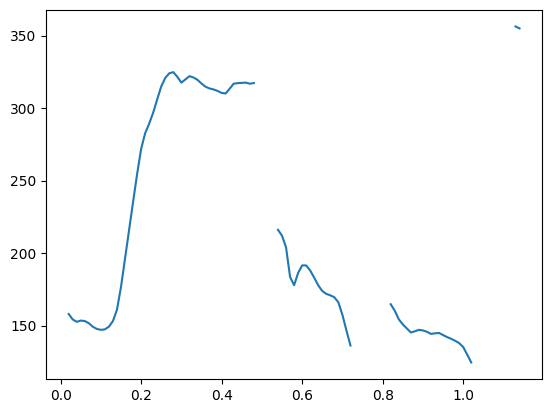

In [ ]:
plt.plot(times, pitch_vals)
plt.show()

Получим объект Formant

In [ ]:
formants = sound.to_formant_burg()
first_formant = [formants.get_value_at_time(1, i) for i in times]
second_formant = [formants.get_value_at_time(2, i) for i in times]

In [ ]:
print(first_formant)

[nan, nan, nan, 266.5474476674229, 276.58143828780334, 241.65927612490506, 214.80565396183968, 200.05386287484134, 190.02464316896305, 185.02952515849094, 187.28804818532058, 190.6841502799275, 195.21274712819152, 194.1779732093989, 205.33297509888746, 217.88434830663954, 238.90159769664007, 253.5938367035523, 288.5460176840204, 313.9483531625616, 308.68971291525185, 310.2586553292613, 302.4979430533348, 306.112558013102, 316.00825999620935, 329.5900654615262, 340.1243463065127, 343.4530826605088, 343.47998698133296, 333.35430582001607, 318.68365612124046, 321.8401233736194, 326.36292367978547, 327.20751296900465, 326.1765806110935, 324.3959791422153, 321.07142148117794, 318.833482707077, 317.46805669735187, 317.8801627326399, 317.2569724909591, 315.37242436080624, 318.4133927407103, 322.5983085724006, 317.36363205781566, 317.96690380162937, 318.94321050034006, 317.8669382145832, 317.3895208980896, 319.1729304364636, 314.3986554948807, 356.54481307912266, 732.9894980895477, 642.3350821

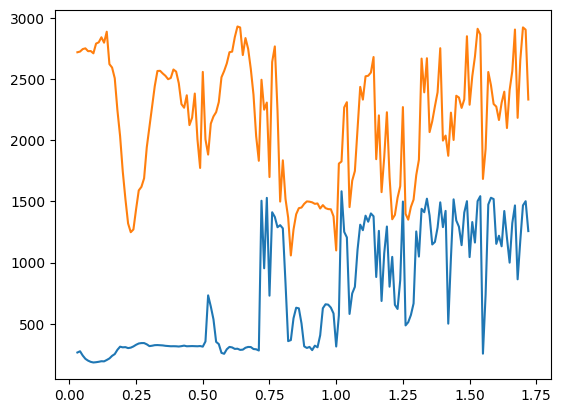

In [ ]:
plt.plot(times, first_formant)
plt.plot(times, second_formant)
plt.show()

Задание: прочитать файлы по ссылке. Взять уровень ideal из каждого .TextGrid. Вычислить значения формант для каждого гласного. Построить точечный график зависимости второй форманты от первой (каждый гласный своим цветом).

#Задание

In [1]:
!pip install tgt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for tgt: filename=tgt-1.4.4-py3-none-any.whl size=28922 sha256=00a92dc6eae74df1cb9ea8cfe79cd94aeeaf794d525049162387240053e27663
  Stored in directory: /root/.cache/pip/wheels/e0/d4/e5/039c9c6c19848fcc33223ee8da975d73b2da572d25da27bea7
Successfully built tgt


In [8]:
from google.colab import drive
import tgt
from glob import glob
import parselmouth
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
from numpy import arange
from collections import defaultdict
path = "/content/drive/MyDrive/STUDY_MY/Programming"

In [12]:
tgt_files = glob(path+'/*.TextGrid')
wav_files = glob(path+'/*.wav')
tgt_files = sorted(tgt_files)
wav_files = sorted(wav_files)

In [48]:
vowels = ['a', 'y', 'o', 'u', 'i', 'e', '\\i-', '\\as']

vowels_formants = dict.fromkeys(vowels)
for i in vowels_formants.keys():
  vowels_formants[i] = []
for i in range(len(tgt_files)):
  grid = tgt.io.read_textgrid(tgt_files[i])
  sound = parselmouth.Sound(wav_files[i])
  try:
    tier = grid.get_tier_by_name("ideal")
    for interval in tier:
      if interval.text in vowels:
        cutted_sound = sound.extract_part(from_time=interval.start_time, to_time=interval.end_time)
        times = arange(0, cutted_sound.xmax, 0.01)
        formants = cutted_sound.to_formant_burg()
        first_formant = [formants.get_value_at_time(1, i) if formants.get_value_at_time(1, i) < 750 else 750 for i in times]
        second_formant = [formants.get_value_at_time(2, i) for i in times]
        vowels_formants[interval.text].append([first_formant, second_formant])
  except:
    continue

In [49]:
vowels_formants

{'a': [[[750,
    750,
    750,
    276.0708864665806,
    239.35430187728232,
    391.7808844404052,
    445.5922270543558,
    419.3019213290738,
    750,
    750],
   [nan,
    nan,
    nan,
    969.2183823471912,
    1027.5900913458645,
    1125.274172785129,
    1113.2365727108004,
    1156.2238522890973,
    nan,
    nan]],
  [[750, 750, 750, 311.0459360917107, 277.87126844716585, 750, 750],
   [nan, nan, nan, 1621.4141285208887, 1498.811687126427, nan, nan]],
  [[750,
    750,
    750,
    750,
    750,
    750,
    449.3308934070966,
    223.64038221202333,
    750,
    750,
    750],
   [nan,
    nan,
    nan,
    1424.3822197812954,
    1468.6534846308346,
    1564.1359493402285,
    1558.6505308767694,
    1553.8515809931753,
    2153.881087825282,
    nan,
    nan]],
  [[750, 750, 750, 259.05039909963403, 302.47646392787306, 750, 750],
   [nan, nan, nan, 706.5022454529408, 2194.610821115301, nan, nan]],
  [[750, 750, 750, 750, 750, 750], [nan, nan, nan, nan, nan, nan]],
  [

In [50]:
vowels_formants_redone = defaultdict(list).fromkeys(vowels)
for i in vowels_formants_redone.keys():
  vowels_formants_redone[i] = []
for k, v in vowels_formants.items():
  first_formant = []
  second_formant = []
  for i in v:
    first_formant += i[0]
    second_formant += i[1]
  vowels_formants_redone[k] = [first_formant, second_formant]

In [51]:
vowels_formants_redone

defaultdict(None,
            {'a': [[750,
               750,
               750,
               276.0708864665806,
               239.35430187728232,
               391.7808844404052,
               445.5922270543558,
               419.3019213290738,
               750,
               750,
               750,
               750,
               750,
               311.0459360917107,
               277.87126844716585,
               750,
               750,
               750,
               750,
               750,
               750,
               750,
               750,
               449.3308934070966,
               223.64038221202333,
               750,
               750,
               750,
               750,
               750,
               750,
               259.05039909963403,
               302.47646392787306,
               750,
               750,
               750,
               750,
               750,
               750,
               750,
               750

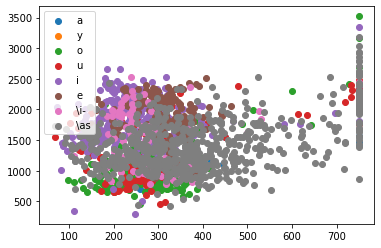

In [52]:
for k, v in vowels_formants_redone.items():
  plt.scatter(v[0], v[1], label=k)
  plt.legend()
plt.show()

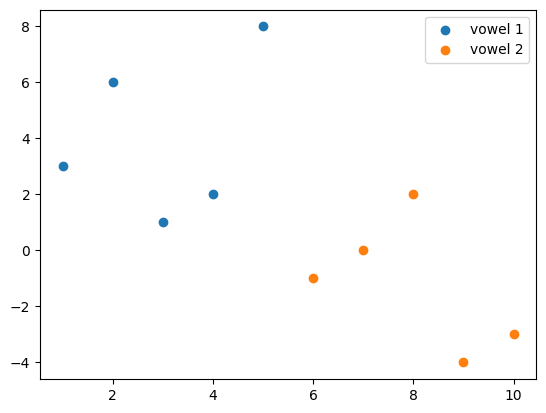

In [ ]:
plt.scatter([1, 2, 3, 4, 5], [3, 6, 1, 2, 8], label="vowel 1")
plt.scatter([6, 7, 8, 9, 10], [-1, 0, 2, -4, -3], label="vowel 2")
plt.legend()
plt.show()